In [1]:
import numpy as np
import crispr_assembler as ca
import matplotlib.pyplot as plt
import editdistance as ed
import os


%load_ext autoreload
%autoreload 2

In [2]:
def restore(path, minimum_occurences = 0):
    read = ca.Read(path)
    read.correct_errors(minimum_occurences = minimum_occurences)
    #gr = read.graph_from_pairs()

    return read#, gr

In [3]:
import pickle

In [4]:
path = '/home/anton/BigMac/skoltech/CRISPR_research/article/data/filtered/'
files = sorted(os.listdir(path))

In [5]:
files

['ES1.merged.assembled.fastq',
 'ES2.merged.assembled.fastq',
 'ES3.merged.assembled.fastq',
 'ES4.merged.assembled.fastq',
 'ES5.merged.assembled.fastq',
 'ES6.merged.assembled.fastq',
 'd24.merged.assembled.fastq',
 'd25.merged.assembled.fastq',
 'd26.merged.assembled.fastq',
 'd27.merged.assembled.fastq',
 'planA.merged.assembled.fastq',
 'sensivity.merged.assembled.fastq']

In [6]:
files = ['ES1.merged.assembled.fastq',
         'ES2.merged.assembled.fastq',
         'd24.merged.assembled.fastq',
         'd25.merged.assembled.fastq',
         'd26.merged.assembled.fastq',
         'd27.merged.assembled.fastq',
         'planA.merged.assembled.fastq',
         'sensivity.merged.assembled.fastq']


In [7]:
mask = np.array([1,1,0,0,0,0,1,1,1,1,1,1]).astype(bool)

In [8]:
reads = np.array(pickle.load(open("../../reads_all", 'rb')))[mask]

In [9]:
len(reads)

8

# Prepare answ

In [39]:
"../../data/answers/ES_answers_50"

'../../data/answers/ES_answers_50'

In [19]:
answer_sensivity = ca.read_arrays_with_tags("../../article/data/answers/sensivity", 0)

In [20]:
answer_sensivity.keys()

dict_keys(['first_2', 'first_3', 'first_5', 'first_7', 'first_8', 'first_11', 'first_14', 'first_15', 'first_21', 'first_22', 'second_2', 'second_3', 'second_5', 'second_7', 'second_8', 'second_11', 'second_14', 'second_15', 'second_21', 'second_22'])

In [21]:
first_old = pickle.load(open("./first_old_answers", 'rb'))
second_old = pickle.load(open("./second_old_answers", 'rb'))

In [23]:
reads[3]

In [31]:
a, d = ca.multiple_arrays_to_ids(first_old, reads[0].spacer_to_cluster_index)

100%|██████████| 14/14 [00:00<00:00, 56.57it/s]


In [32]:
d

{'1,11,14,15.1,19': [15, 15, 16, 12, 10, 14, 13, 13],
 31: [15, 15, 16, 12, 10, 14, 15, 14, 13, 12, 14, 15, 13, 15, 13, 14],
 '66, 3x,8,6n': [0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0],
 '5n,60x': [0, 0, 0, 0, 13, 16, 0, 0, 0, 0, 0],
 '15n,16n': [0, 0, 0, 0, 13, 16, 0, 0, 0, 0],
 3: [14, 14, 14, 14, 15, 12, 11],
 '2,3n,13,20,22,24,60,61,62,68': [13, 13, 14, 13],
 12: [15, 14, 15, 14],
 15: [15, 14, 14, 14, 14, 15, 13, 13, 14, 15, 14, 13, 14, 14, 13],
 27: [15, 14, 14, 15, 13, 14, 14, 14, 13, 13, 13, 15, 15, 15],
 67: [15, 14, 14, 14, 15, 14, 13],
 7: [12, 13, 14, 15, 15, 14, 15, 16, 12],
 '9,21,23,65,70': [16, 14, 15, 14, 15, 14, 14, 15, 15, 14],
 75: [14, 15, 13, 14, 13, 12, 12]}

In [33]:
a

{'1,11,14,15.1,19': [5, 3, 1, 0, 8, 21, 6, 14],
 31: [5, 3, 1, 0, 8, 21, 17, 4, 6, 3, 4, 7, 14, 16, 3, 2],
 '66, 3x,8,6n': [15, 2, 7, 3, 12, 13, 17, 8, 16, 11, 9, 18],
 '5n,60x': [15, 2, 7, 14, 7, 3, 12, 13, 17, 8, 16],
 '15n,16n': [15, 2, 7, 14, 7, 3, 16, 11, 9, 18],
 3: [12, 19, 12, 18, 5, 4, 20],
 '2,3n,13,20,22,24,60,61,62,68': [1, 11, 12, 20],
 12: [16, 12, 11, 14],
 15: [16, 7, 7, 14, 6, 14, 16, 5, 4, 10, 8, 0, 3, 8, 13],
 27: [16, 7, 7, 14, 16, 3, 8, 13, 8, 10, 7, 2, 0, 15],
 67: [16, 7, 7, 6, 14, 8, 0],
 7: [0, 6, 19, 5, 6, 4, 17, 1, 16],
 '9,21,23,65,70': [17, 12, 4, 2, 6, 0, 3, 17, 5, 4],
 75: [1, 0, 10, 15, 18, 6, 18]}

In [37]:
a, d = ca.multiple_arrays_to_ids(second_old, reads[0].spacer_to_cluster_index)

100%|██████████| 13/13 [00:00<00:00, 61.80it/s]


In [38]:
d

{'1,11,14,15.1,19': [12, 14, 13, 14, 15, 15, 14, 13, 12, 14, 14, 13, 12, 12],
 31: [15, 14, 15, 13, 14, 15, 14, 15, 13, 13, 14, 14, 13],
 '66, 3x,8,6n': [0, 0, 0, 0, 1, 0],
 '5n,60x': [0, 0, 0, 0, 2, 0],
 3: [15, 15, 14, 13, 12, 14, 13, 14],
 '2,3n,13,20,22,24,60,61,62,68': [14, 12, 15, 15, 14, 15, 14, 14, 14],
 12: [14, 14, 15, 14, 13],
 15: [14, 14, 14, 14, 14, 14],
 27: [14, 13, 14, 15, 15, 14, 13, 12, 14, 14, 13, 12, 12],
 67: [14, 14, 15, 14, 13],
 7: [15, 14, 15, 15, 14, 16, 14],
 '9,21,23,65,70': [15, 0, 14, 13, 14, 13, 15, 13, 13],
 75: [16, 12, 13, 14, 15, 13, 14, 14, 14, 14, 16, 13]}

## sample exps

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [122]:
from scipy.optimize import fsolve, least_squares

import tqdm

In [29]:
i, j = 5, 10

In [80]:
def f(arg, set1, set2, set12):
    mu1, mu2, sigma1, sigma2 = arg
    
    dsigma1 = sum([(-sigma1**2 * (sigma1 + sigma2)**3 + (xi-mu1)**2 * (sigma1 + sigma2)**3) for xi in set1]) + \
                   sum([-(sigma1 + sigma2)*sigma1**3 + (xi - mu1 - mu2)**2 * sigma1**3 for xi in set12])

    dsigma2 = sum([(-sigma2**2 * (sigma1 + sigma2)**3 + (xi-mu2)**2 * (sigma1 + sigma2)**3) for xi in set2]) + \
                   sum([-(sigma1 + sigma2)*sigma2**3 + (xi - mu1 - mu2)**2 * sigma2**3 for xi in set12])
        

    dmu1 = sum([(sigma1 +sigma2)**2 * (xi - mu1) for xi in set1]) + \
                sum([sigma1**2 * (xi - mu1 - mu2) for xi in set12])
        
    dmu2 = sum([(sigma1 +sigma2)**2 * (xi - mu2) for xi in set2]) + \
                sum([sigma2**2 * (xi - mu1 - mu2) for xi in set12])
        
        
    return dmu1, dmu2, dsigma1, dsigma2

In [75]:
def f(arg, set1, set2, set12):
    mu1, mu2, sigma1, sigma2 = arg
    
    dsigma1 = sum([-1 / sigma1 + (xi-mu1)**2 / sigma1**3 for xi in set1]) + \
                   sum([-1 / (sigma1 + sigma2) + (xi - mu1 - mu2)**2 / (sigma1 + sigma2)**3 for xi in set12])

    dsigma2 = sum([- 1 / sigma2 + (xi-mu2)**2 / sigma2**3 for xi in set2]) + \
                   sum([-1 / (sigma1 + sigma2) + (xi - mu1 - mu2)**2 /  (sigma1 + sigma2)**3 for xi in set12])
        

    dmu1 = sum([ 1/ sigma1**2 * (xi - mu1) for xi in set1]) + \
                sum([1 / (sigma1 + sigma2) **2 * (xi - mu1 - mu2) for xi in set12])
        
    dmu2 = sum([1 / sigma2**2 * (xi - mu2) for xi in set2]) + \
                sum([1 / (sigma1 + sigma2)**2 * (xi - mu1 - mu2) for xi in set12])
        
        
    return dmu1, dmu2, dsigma1, dsigma2

In [97]:
def MLE(arg, set1, set2, set12):
    mu1, mu2, sigma1, sigma2 = arg
    
    log_likelihood = -(sum([-np.log(sigma1) - (xi - mu1) **2 / (2*sigma1**2) for xi in set1]) +\
                        sum([-np.log(sigma1 + sigma2) - (xi - mu1 - mu2)**2 / (2*(sigma1 + sigma2)**2) for xi in set12]) +\
                        sum([-np.log(sigma2) - (xi - mu2) **2 / (2*sigma2**2) for xi in set2]))
    
    return log_likelihood

<Container object of 15 artists>

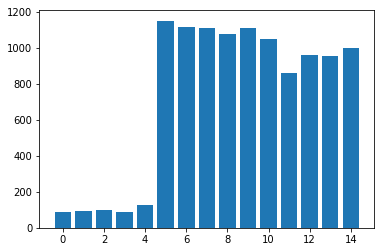

In [139]:
a = np.random.normal(100, 19, 10)
b = np.random.normal(1000, 50, 10)
x = np.zeros(15)
x[:10] += a
x[5:] += b
plt.bar(np.arange(15), x)

In [140]:
idxs, jdxs, costs, stds = [],[],[],[]
for i in tqdm.tqdm_notebook(range(0, 10)):
    for j in range(i, 15):
        #solution = fsolve(f, [100, 1000, 20, 50], (x[:i], x[j:], x[i:j]), maxfev =10000)
#         print(solution)
#         print("===========================================================")
        #if all(solution  > 0) and solution[-1] > 1 and solution[-2] > 1:
       # print (i, j, solution, solution[-1] + solution[-2])
        solution= least_squares(MLE,
                                [100, 1000, 20, 50],
                                bounds = ((10,10,1,1), (1200, 1200, 100,100)),
                                args = (x[:i], x[j:], x[i:j]))
        #print(i, j, solution.cost, solution.x)
        idxs.append(i)
        jdxs.append(j)
        costs.append(solution.cost)
        stds.append(sum(solution.x[-2:]))

A Jupyter Widget

In [141]:
for idx in np.argsort(costs)[:5]:
    print(idx, idxs[idx], jdxs[idx], costs[idx])

71 5 11 1830.842583604953
70 5 10 1878.5658411361262
69 5 9 1986.6923514334605
68 5 8 2011.3421023052058
72 5 12 2012.624049429078


In [142]:
for idx in np.argsort(stds)[:5]:
    print(idx, idxs[idx], jdxs[idx], stds[idx])

71 5 11 60.28714034557492
70 5 10 66.29568767235914
72 5 12 73.44635115324373
69 5 9 78.5440887396662
73 5 13 81.29894321679345


In [132]:
np.mean(x)

743.1070937237052

In [133]:
np.std(x)

452.12894382336077

In [86]:
f(solution, x[:i], x[j:], x[i:j])

(-1.1442594720081965e-115,
 -1.2892664710628451e-115,
 1.2808516508806115e-171,
 1.0252046757076434e-171)

In [79]:
solution

array([ 2.35077021e+150, -1.33980631e+154,  1.87245911e+151,
        1.72604698e+153])

In [45]:
s = fsolve(f, [100, 1000, 100, 100])
print(s)
print(f(s))

[8.00799177e+01 9.40727599e+02 2.03481453e-07 3.12442104e-07]
(1.3508925599936928e-13, -1.3812593648656806e-13, 7.340844645485776e-15, 2.8340805080499708e-14)


In [64]:
f([ 3.57727208e+03,  2.19322629e+02, -9.95162340e+05, -5.18485798e+06], )

TypeError: f() missing 3 required positional arguments: 'set1', 'set2', and 'set12'

In [65]:
f([ 106.44261258, 1001.81280334,   14.03005082,   69.96303392], x[:i], x[j:], x[i:j])

(26851512.96384861, -630779.8052032122, 2173249432855.6702, 17512372403.387062)

In [7]:
i = 10
j = 5

In [8]:
A = [[i, j], [15 - i, 15 - j]]

In [9]:
B = [sum(c[:i]), sum(c[j:])]

In [10]:
np.dot(np.linalg.inv(A), B)

array([  81.42965628, 1007.30625129])